# Downloading data with Python

https://realpython.com/python-download-file-from-url/#downloading-a-large-file-in-a-streaming-fashion

# Using urllib

* Used for prototyping and small projects

In [1]:
import urllib

* `urllib.request.urlretrive()` -> solicita información de la web y guarda el resultado de la response en un archivo local

In [2]:
urlretrive = urllib.request.urlretrieve

In [ ]:
urlretrive?

Signature: urlretrive(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      c:\users\isaul\anaconda3\lib\urllib\request.py
Type:      function

In [4]:
url = (
    "https://api.worldbank.org/v2/en/indicator/"
    "NY.GDP.MKTP.CD?downloadformat=csv"
)
filename = "gdp_by_country.zip"

In [10]:
path, headers = urlretrive(url=url, filename=f"../datasets/{filename}")

In [11]:
path

'../datasets/gdp_by_country.zip'

In [17]:
headers, type(headers),# headers.items()

(<http.client.HTTPMessage at 0x27271287d10>, http.client.HTTPMessage)

* No especificar `filename` retorna un archivo temporal

In [13]:
for name, value in headers.items(): 
    print(name, value)

Date Mon, 08 Sep 2025 21:28:10 GMT
Content-Type application/zip
Content-Length 140080
Connection close
Server cloudflare
CF-Ray 97c188b81aef1031-LAX
CF-Cache-Status DYNAMIC
Cache-Control public, must-revalidate, max-age=1
Content-Disposition attachment; filename=API_NY.GDP.MKTP.CD_DS2_en_csv_v2_595379.zip
Expires Mon, 08 Sep 2025 21:28:11 GMT
Last-Modified Mon, 08 Sep 2025 21:28:10 GMT
Set-Cookie api.worldbank.orgCORS=403be8494990e664779c34c52fa19686; Path=/; SameSite=None; Secure
Set-Cookie api.worldbank.org=403be8494990e664779c34c52fa19686; Path=/
Set-Cookie __cf_bm=uQ4SRWgjU1j8fGNdo.QPOFktaHQiKdyhDtn1nlcRh.I-1757366890-1.0.1.1-6oBpbqGBN.HyQvl8dHvxbEPwJiAIxYhVoB.kmm2h_lyHHUr3ufcvGGmoWEpl5fMZaOwNHGCiWiyOjKkA7ss7TsvJR4j2Eo4l27doZdMazOc; path=/; expires=Mon, 08-Sep-25 21:58:10 GMT; domain=.worldbank.org; HttpOnly
Set-Cookie _cfuvid=9CL_eYItBgPxqJIqXq3Vlng4t9mGEoox_IAbkbovJ_Q-1757366890558-0.0.1.1-604800000; path=/; domain=.worldbank.org; HttpOnly
Set-Cookie __cf_bm=KeejolQ.LLKgSguiB01k1

In [20]:
img_url = r"https://cdn.milenio.com/uploads/media/2022/10/13/hasbulla-instagram.jpg"
urlretrive(img_url, "../images/hasbulla.jpg")

('../images/hasbulla.jpg', <http.client.HTTPMessage at 0x27272fe2250>)

In [22]:
from PIL import Image

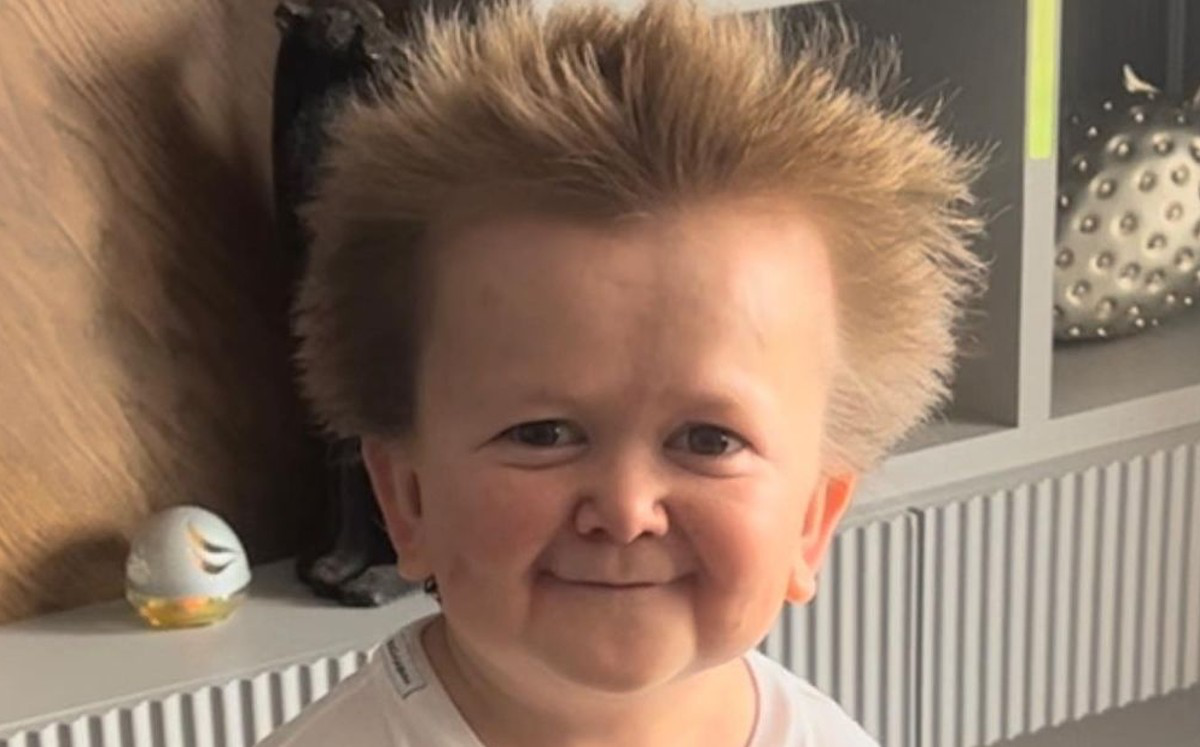

In [ ]:
url
hasbu = Image.open("../images/hasbulla.jpg")
hasbu

## Using requests

* Permite hacer HTTP requests avanzados
* Util cuando se requiere auntenficación

In [18]:
import requests

In [45]:
requests.get?

Signature: requests.get(url, params=None, **kwargs)
Docstring:
Sends a GET request.

:param url: URL for the new :class:`Request` object.
:param params: (optional) Dictionary, list of tuples or bytes to send
    in the query string for the :class:`Request`.
:param \*\*kwargs: Optional arguments that ``request`` takes.
:return: :class:`Response <Response>` object
:rtype: requests.Response
File:      c:\users\isaul\anaconda3\lib\site-packages\requests\api.py
Type:      function

In [41]:
url = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD"
query_params = {'downloadformat': 'csv'}

In [48]:
response = requests.get(url, params=query_params)
response, type(response), response.url, response.status_code

(<Response [200]>,
 requests.models.Response,
 'https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv',
 200)

### Saving content to a file

In [52]:
with open("../datasets/gpd_by_country_req.zip", mode='wb') as file:
    file.write(response.content)

In [53]:
url_img = r"https://beautiful-soup-4.readthedocs.io/en/latest/_images/6.1.jpg"
r = requests.get(url_img, stream=True)
r.status_code

200

In [ ]:
with open("../images/sapo.png", mode='wb') as file: 
    file.write(r.content)  # OK

## Large files

* Descargar archvos grandes requiere que el computador almacene en memoria mucha información, algo que puede causar errores. 

* Para evitar errores se usa *straming* de los datos: estos se cargan en memoria por *chunks* (pedazos) del archivo original y se escriben en el archivo de salida. 

In [65]:
url = r"https://databank.worldbank.org/data/download/WDI_CSV.zip"
response = requests.get(url, stream=True)  # request connection in straming manner
response.status_code

200

In [66]:
response.headers, type(response.headers)

({'Date': 'Mon, 08 Sep 2025 22:25:16 GMT', 'Content-Type': 'application/octet-stream', 'Content-Length': '282306239', 'Connection': 'keep-alive', 'Last-Modified': 'Wed, 02 Jul 2025 21:04:24 GMT', 'ETag': '0x8DDB9AC0604D2AB', 'x-ms-request-id': '82340099-b01e-003a-740b-213117000000', 'x-ms-version': '2009-09-19', 'x-ms-lease-status': 'unlocked', 'x-ms-blob-type': 'BlockBlob', 'x-azure-ref': '20250908T222516Z-1745df5755cm4v9chC1MEXsmt40000000sa000000000080s', 'Cache-Control': 'public, max-age=3600', 'x-fd-int-roxy-purgeid': '0', 'X-Cache': 'TCP_HIT', 'Accept-Ranges': 'bytes'},
 requests.structures.CaseInsensitiveDict)

In [67]:
for key, value in response.headers.items(): 
    print(key, value)

Date Mon, 08 Sep 2025 22:25:16 GMT
Content-Type application/octet-stream
Content-Length 282306239
Connection keep-alive
Last-Modified Wed, 02 Jul 2025 21:04:24 GMT
ETag 0x8DDB9AC0604D2AB
x-ms-request-id 82340099-b01e-003a-740b-213117000000
x-ms-version 2009-09-19
x-ms-lease-status unlocked
x-ms-blob-type BlockBlob
x-azure-ref 20250908T222516Z-1745df5755cm4v9chC1MEXsmt40000000sa000000000080s
Cache-Control public, max-age=3600
x-fd-int-roxy-purgeid 0
X-Cache TCP_HIT
Accept-Ranges bytes


* La conneción se mantiene `keep-alive`, lo que permite mantener aberta la conexion y mandar multiples HTTP requests

* Es posible iterar en el contenido usando `.iter_content()`

In [74]:
2**10

1024

In [ ]:
with open("../datasets/WDI_CSV.zip", mode='wb') as file: 
    for chunk in response.iter_content(chunk_size=10*1024): 
        # chunk is 10 Kilobyte size
        file.write(chunk)

## Performing Parallel File Downloads

* Es posible descargar multiples archivos en paralelo


### Using *Pool of Threads* with *requests*

In [75]:
from concurrent.futures import ThreadPoolExecutor

* Content-Disposition header indicates whether content should be displayed inline in the browser as a web page or part of a web page or downloaded as an attachment locally

In [83]:
def download_file(url):
    # Download a single file from a given URL
    try: 
        response = requests.get(url)
        if "content-disposition" in response.headers:
            content_disposition = response.headers["content-disposition"]
            filename = content_disposition.split("filename=")[1]
        else:
            filename = url.split("/")[-1]
        with open(filename, mode="wb") as file:
            file.write(response.content)
        print(f"Downloaded file {filename}")
    except requests.exceptions.RequestException as e: 
        print(f"Error: {e}")

In [79]:
download_file("cok.com/cok.dat")

Error: Invalid URL 'cok.com/cok.dat': No scheme supplied. Perhaps you meant https://cok.com/cok.dat?


In [82]:
template_url = (
    "https://api.worldbank.org/v2/en/indicator/"
    "{resource}?downloadformat=csv"
)
urls = [
    template_url.format(resource="SP.POP.TOTL"), 
    template_url.format(resource="NY.GDP.MKTP.CD"),
    template_url.format(resource="EN.POP.DNST")
]
for url in urls: print(url)

https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
https://api.worldbank.org/v2/en/indicator/EN.POP.DNST?downloadformat=csv


* Para descargar los archivos de manera concurrente creamos una ThreadPool como un context manager

In [84]:
with ThreadPoolExecutor() as executor: 
    executor.map(download_file, urls)

Downloaded file API_NY.GDP.MKTP.CD_DS2_en_csv_v2_599864.zip
Downloaded file API_SP.POP.TOTL_DS2_en_csv_v2_600722.zip
Downloaded file API_EN.POP.DNST_DS2_en_csv_v2_599853.zip
